# Decision Tree Implementation in Python

## Importing the Required Libraries and Reading the data

First thing is to import all the necessary libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for encoding
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

Now load the dataset. IRIS dataset is available in the seaborn library as well. you can import it with the following command

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


you should be able to get the above data. Here we have 4 feature columns sepal_length, sepal_width, petal_length, and petal_width respectively with one target column species.

## EDA
Now performing some basic operations on it.

In [4]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

we understand that this dataset has 150 records, 5 columns with the first four of type float and last of type object str and there are no NAN values as form following command

In [6]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Now we perform some basic EDA on this dataset. Let’s check the correlation of all the features with each other

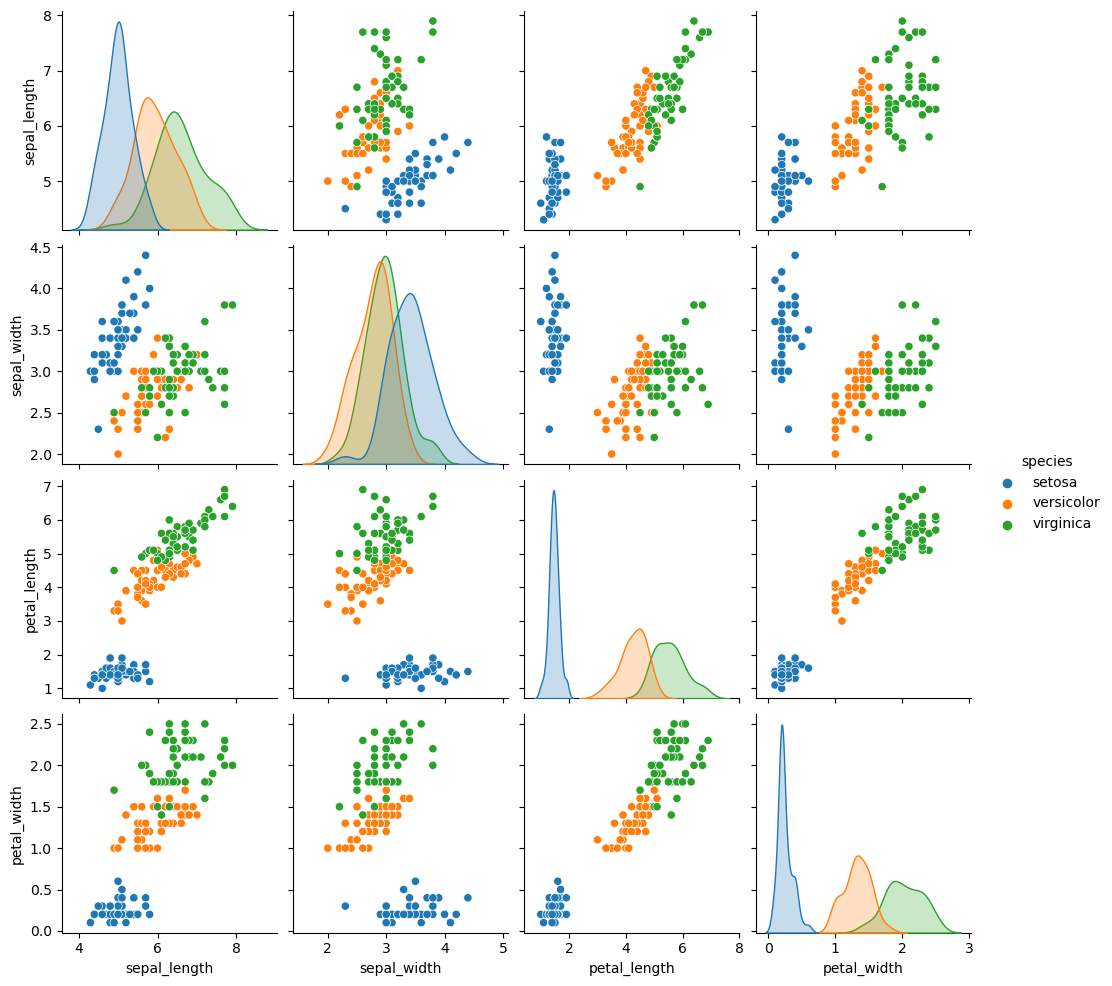

In [7]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

We have a total of 3 species that we want to predict: setosa, versicolor, and virginica. We can see that setosa always forms a different cluster from the other two.

<AxesSubplot:>

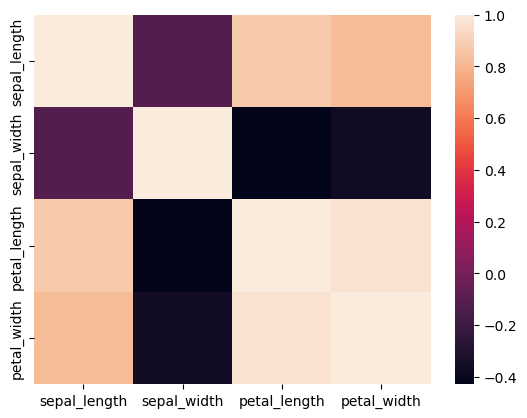

In [8]:
# correlation matrix
sns.heatmap(df.corr())

In [28]:
print(df.corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


We can observe from the above two plots:

1. Setosa always forms a different cluster.
2. Petal length is highly related to petal width.
3. Sepal length is not related to sepal width.

## Data Preprocessing
Now, we will separate the target variable(y) and features(X) as follows

In [9]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis = 1)

It is good practice not to drop or add a new column to the original dataset. Make a copy of it and then modify it so in case things don’t work out as we expected, we have the original data to start again with a different approach.

Just for the sake of following mostly used convention, we are storing df in X

In [10]:
# Defining the attributes
X = df1

Now let’s look at our target variable

In [11]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

target has categorical variables stored in it we will encode it in numeric values for working.

In [12]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We get its encoding as above, setosa:0, versicolor:1, virginica:2

In [13]:
y = target

Splitting the dataset into training and testing sets. selecting 20% records randomly for testing

In [14]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records(rows) for training and 30 records for testing purposes.

## Modeling Tree and testing it

In [15]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In the above code, we created an object of the class DecisionTreeClassifier , store its address in the variable dtree, so we can access the object using dtree. Then we fit this tree with our X_train and y_train . Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

In [16]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We got an accuracy of 100% on the testing dataset of 30 records.

let’s plot the confusion matrix as follows

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<AxesSubplot:>

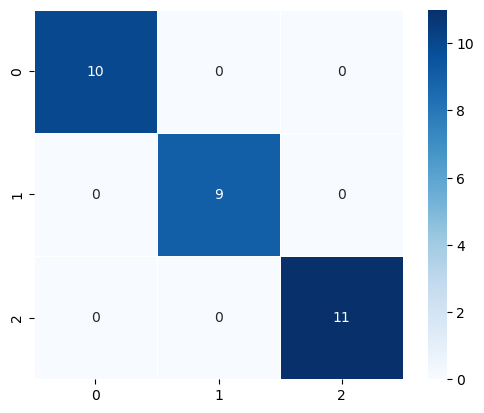

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
#plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')
#all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
#plt.title(all_sample_title, size = 15)'''

In [19]:
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Visualizing the decision tree
We can directly plot the tree that we build using the following commands

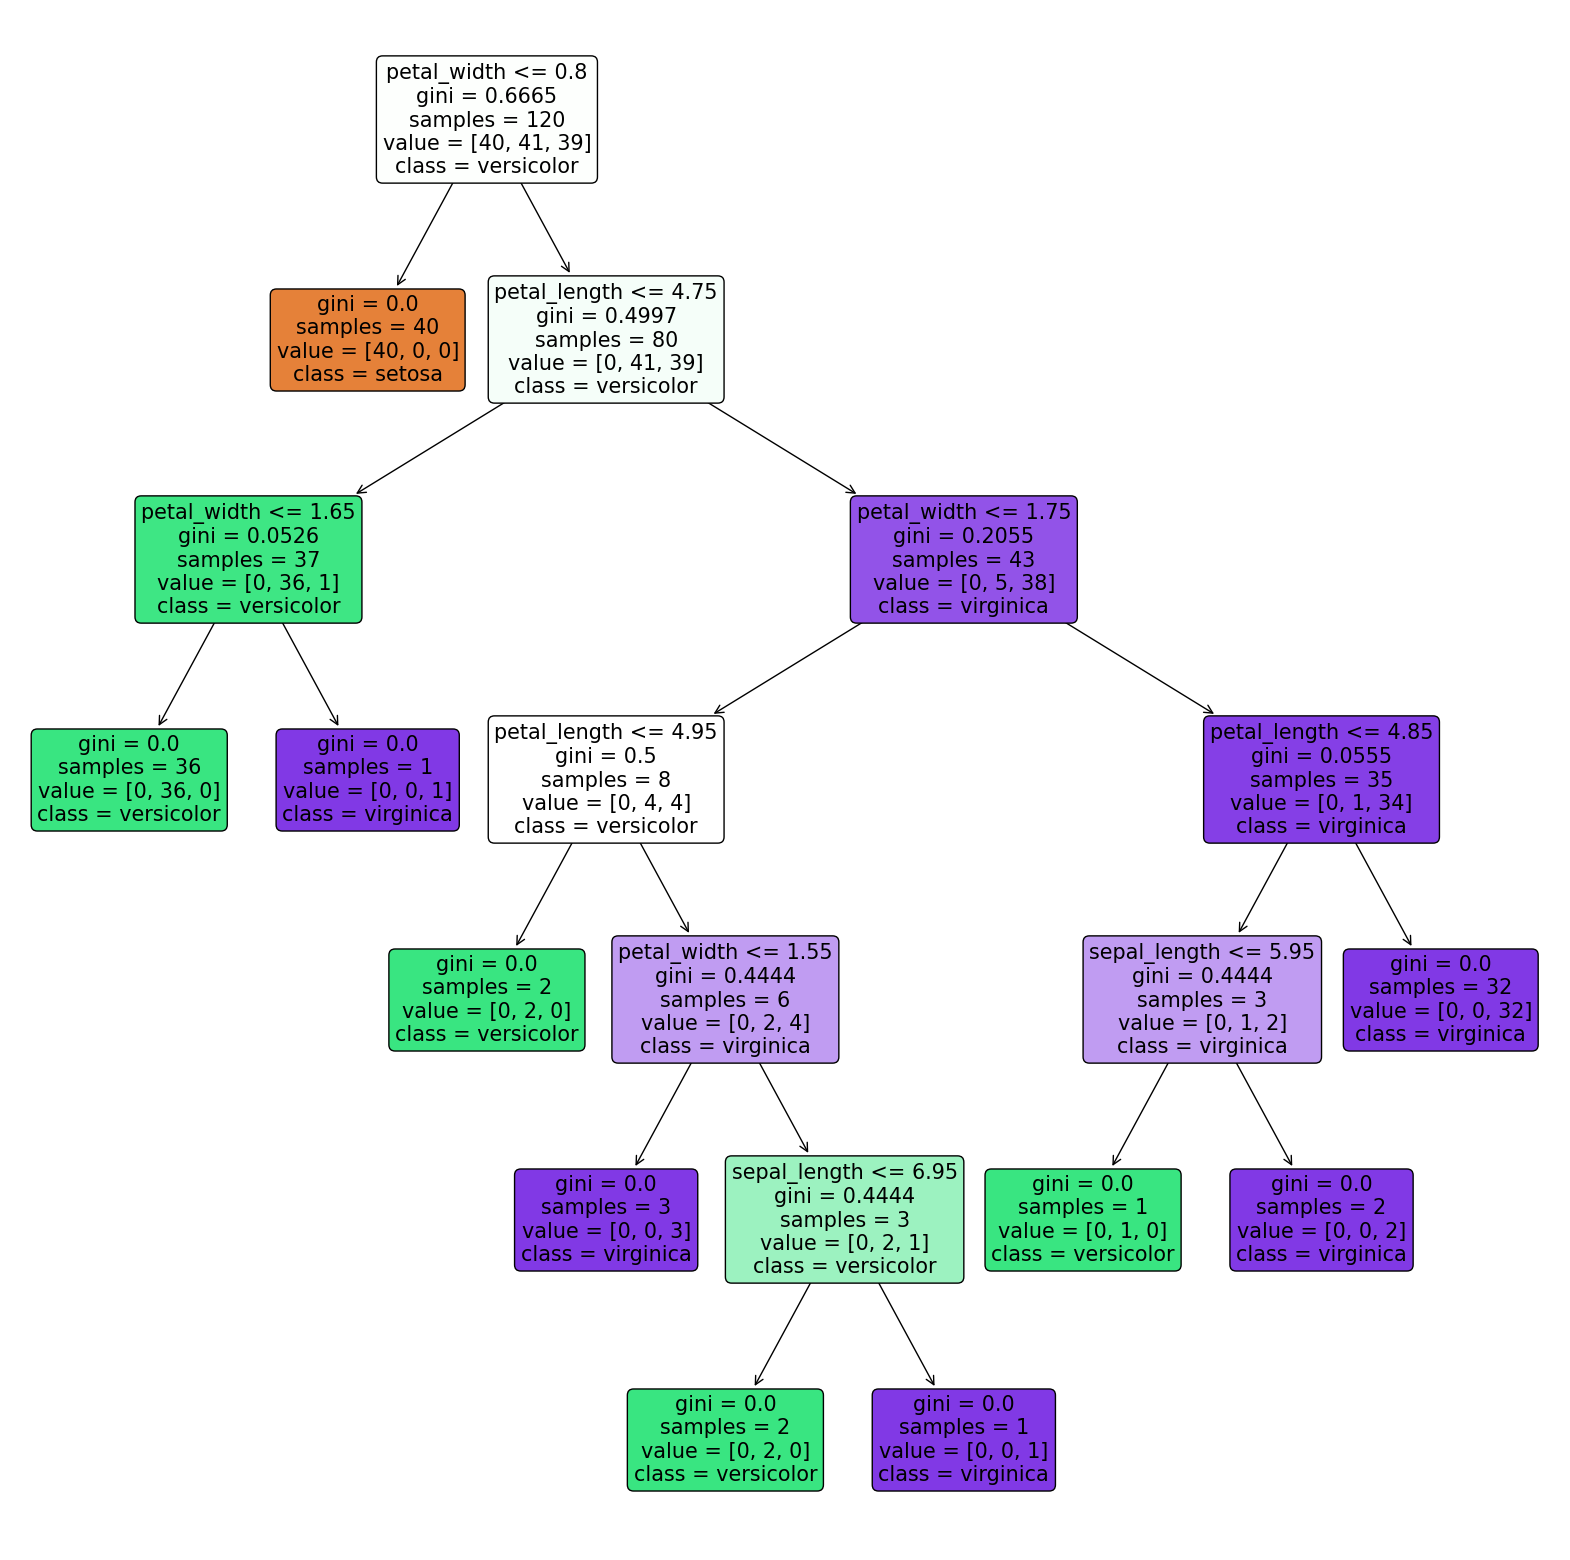

In [18]:
# Visualizing the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree = dtree, feature_names = df1.columns,
                     class_names = ['setosa', 'versicolor', 'virginica'],
                     filled = True, precision = 4, rounded = True)

We can see how the tree is split, what are the gini for the nodes, the records in those nodes, and their labels.

# Random Forrest

In [24]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import metrics

In [5]:
data=pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
pd.unique(data['Outcome'])

array([1, 0], dtype=int64)

In [17]:
#feature selection
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [18]:
#split Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

In [20]:
#Fitting Decision Tree Classifier to the training set
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion="entropy")
clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [21]:
#predicting the test set result
y_pred=clf.predict(X_test)

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[115  15]
 [ 27  35]]


In [25]:
metrics.classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.85       130\n           1       0.70      0.56      0.62        62\n\n    accuracy                           0.78       192\n   macro avg       0.75      0.72      0.74       192\nweighted avg       0.77      0.78      0.77       192\n'

In [27]:
metrics.accuracy_score(Y_test,y_pred)*100

78.125